Correlation

What is correlation?
Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

For example, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2)

How does correlation help in feature selection?
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.





Import the necessary libraries


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

Loading the dataset

In [25]:
data = pd.read_csv('Exercise-CarData.csv')

In [26]:
data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [27]:
data = data.iloc[:,:-1]
data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


***Selecting features based on correlation***

Generating the correlation matrix

In [29]:
corr = data.corr()
corr.head()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC
Unnamed: 0,1.000000,-0.738289,0.907090,-0.078616,0.066299,-0.184490
Price,-0.738289,1.000000,-0.878407,0.112041,0.033081,0.165067
Age,0.907090,-0.878407,1.000000,-0.099659,0.032573,-0.120706
MetColor,-0.078616,0.112041,-0.099659,1.000000,-0.013973,0.029189
Automatic,0.066299,0.033081,0.032573,-0.013973,1.000000,-0.069321


Generating the correlation heatmap


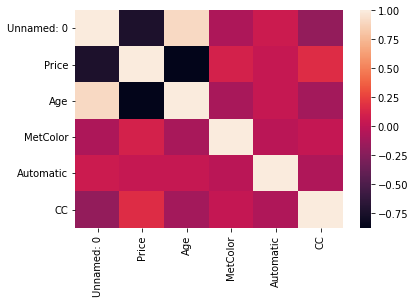

In [30]:
sns.heatmap(corr)

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [31]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [35]:
selected_columns = data.columns[columns]
selected_columns.shape

IndexError: ignored

In [34]:
data = data[selected_columns]
print(data)

NameError: ignored